In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Clean Up Data (Check null, missing values)

In [3]:
##Check data information, !!!记得解释每个attribute的含义
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
## Drop Age missing value on both side
train_df = train.dropna(axis=0, subset=['Age'])
test_df = test.dropna(axis=0, subset=['Age'])
train_df.info() ## Drop Age Missing Value
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 11 columns):
PassengerId    332 non-null int64
Pclass         332 non-null int64
Name           332 non-null object
Sex            332 non-null object
Age            332 non-null float64
SibSp          332 non-null int64
Parch          332 non-null int64
Ticket         332 non-null

In [7]:
## Fill the Cabin(Train), Cabin, Fare(Test NAN Value)
train_df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [8]:
train_df['Embarked'].mode()

0    S
dtype: object

In [9]:
train_df['Cabin'] = train_df['Cabin'] .replace(np.nan, 'X')
train_df['Embarked'] = train_df['Embarked'] .replace(np.nan, 'S')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          714 non-null object
Embarked       714 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# test data fill missing value
test_df['Cabin'] = test_df['Cabin'] .replace(np.nan, 'X')
test_df['Fare'] = test_df['Fare'] .fillna(test_df['Fare'].median())
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 11 columns):
PassengerId    332 non-null int64
Pclass         332 non-null int64
Name           332 non-null object
Sex            332 non-null object
Age            332 non-null float64
SibSp          332 non-null int64
Parch          332 non-null int64
Ticket         332 non-null object
Fare           332 non-null float64
Cabin          332 non-null object
Embarked       332 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 31.1+ KB


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Outliners Detection

In [11]:
train_df.describe() ## check the min, max, mean, median value

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [12]:
##Outlier detection
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare (train_data)
Outliers_to_drop = detect_outliers(train_df,2,["Age","SibSp","Parch","Fare"])

In [13]:
train_df.loc[Outliers_to_drop]## No Outliners inside

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
## Check test data
Outliers_to_drop = detect_outliers(test_df,2,["Age","SibSp","Parch","Fare"])

In [15]:
test_df.loc[Outliers_to_drop] ##test data also has no outliers
##train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)  ## Otherwise

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Feature Analysis

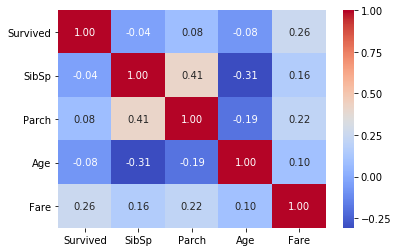

In [16]:
##For all numerical data
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
##Only Fare feature seems to have a significative correlation with the survival probability

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


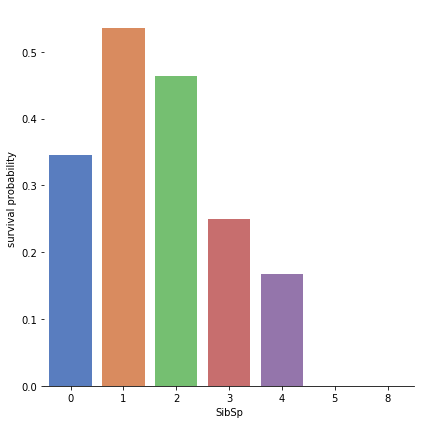

In [17]:
g = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted", ci=None)
g.despine(left=True)
g = g.set_ylabels("survival probability")
##It seems that passengers having a lot of siblings/spouses have less chance to survive
##Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive
##This observation is quite interesting, we can consider a new feature describing these categories (See feature engineering)

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


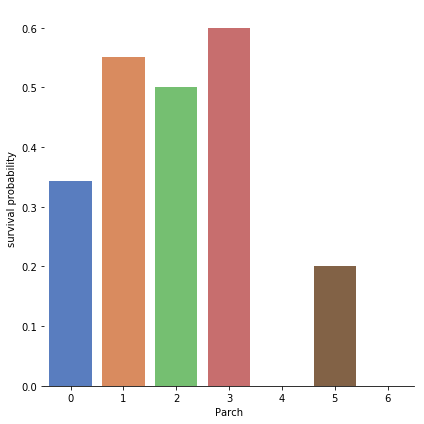

In [18]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted", ci=None)
g.despine(left=True)
g = g.set_ylabels("survival probability")
##Small families have more chance to survive, more than single (Parch 0), medium (Parch 3,4) and large families (Parch 5,6 ).
##Be carefull there is an important standard deviation in the survival of passengers with 3 parents/children

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


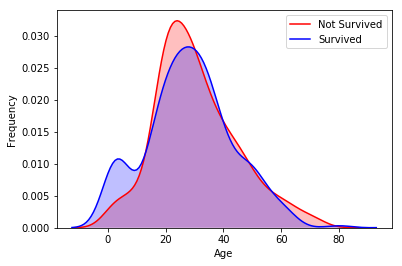

In [19]:
## Deal with age
g = sns.kdeplot(train["Age"][(train["Survived"] == 0)], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])
#When we superimpose the two densities , we cleary see a peak correponsing (between 0 and 5) to babies and very young childrens.

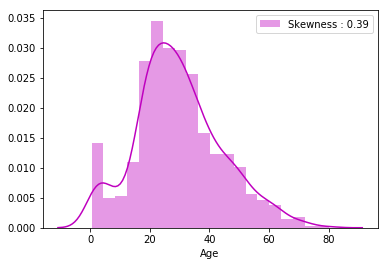

In [20]:
g = sns.distplot(train_df["Age"], color="m", label="Skewness : %.2f"%(train_df["Age"].skew()))
g = g.legend(loc="best")

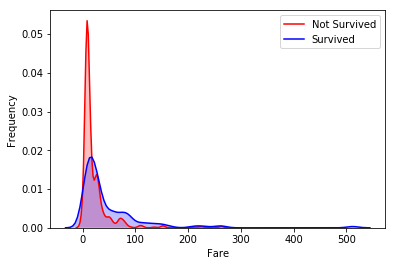

In [21]:
g = sns.kdeplot(train["Fare"][(train["Survived"] == 0)], color="Red", shade = True)
g = sns.kdeplot(train["Fare"][(train["Survived"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("Fare")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

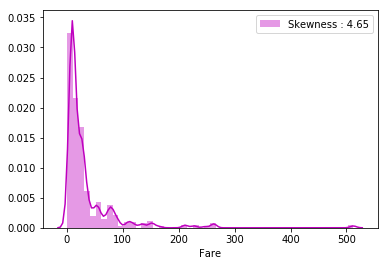

In [22]:
##Fare  Need to reduce the skewness distribution? 
g = sns.distplot(train_df["Fare"], color="m", label="Skewness : %.2f"%(train_df["Fare"].skew()))
g = g.legend(loc="best")

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


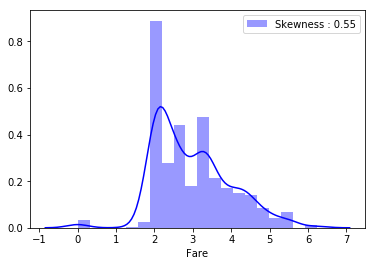

In [23]:
train_df["Fare"] = train_df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
g = sns.distplot(train_df["Fare"], color="b", label="Skewness : %.2f"%(train_df["Fare"].skew()))
g = g.legend(loc="best")

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


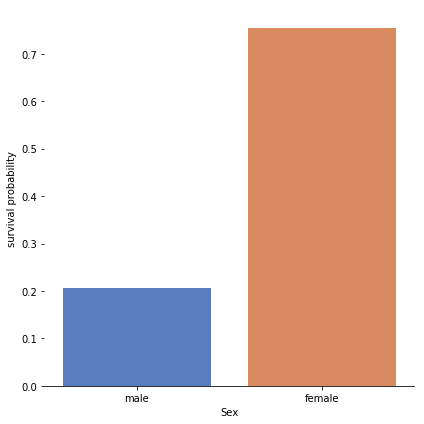

In [24]:
## Categorical data
#Sex
g = sns.factorplot(x="Sex",y="Survived",data=train_df,kind="bar", size = 6 , 
palette = "muted", ci=None)
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [25]:
train_df[["Sex","Survived"]].groupby('Sex').mean()
##It is clearly obvious that Male have less chance to survive than Female.
##So Sex, might play an important role in the prediction of the survival.
##For those who have seen the Titanic movie (1997), I am sure, we all remember this sentence during the evacuation : "Women and children first".

,Survived
Sex,
female,0.754789
male,0.205298


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


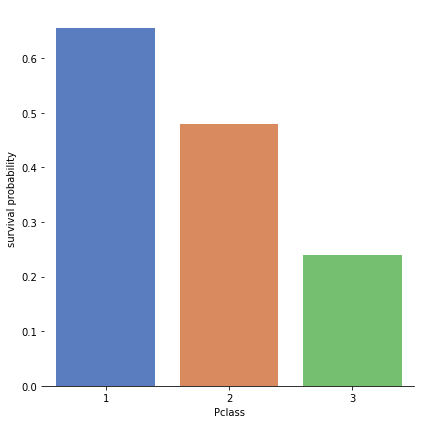

In [26]:
g = sns.factorplot(x="Pclass",y="Survived",data=train_df,kind="bar", size = 6 , 
palette = "muted", ci=None)
g.despine(left=True)
g = g.set_ylabels("survival probability")

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


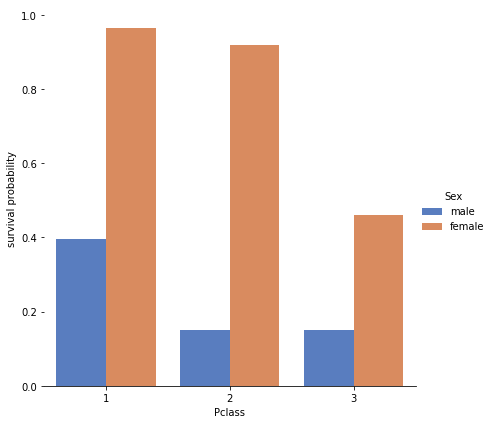

In [27]:
g = sns.factorplot(x="Pclass",y="Survived",hue='Sex', data=train_df,kind="bar", size = 6 , 
palette = "muted", ci=None)
g.despine(left=True)
g = g.set_ylabels("survival probability")
##The passenger survival is not the same in the 3 classes. First class passengers have more chance to survive than second class and third class passengers.

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


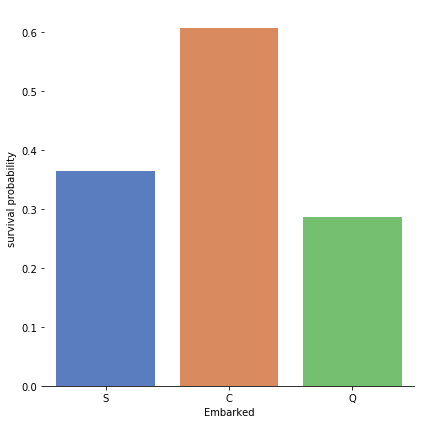

In [28]:
# Explore Embarked vs Survived 
g = sns.factorplot(x="Embarked", y="Survived",  data=train_df,
                   size=6, kind="bar", palette="muted", ci=None)
g.despine(left=True)
g = g.set_ylabels("survival probability")
##It seems that passenger coming from Cherbourg (C) have more chance to survive.
#My hypothesis is that the proportion of first class passengers is higher for those who came from Cherbourg than Queenstown (Q), Southampton (S).

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


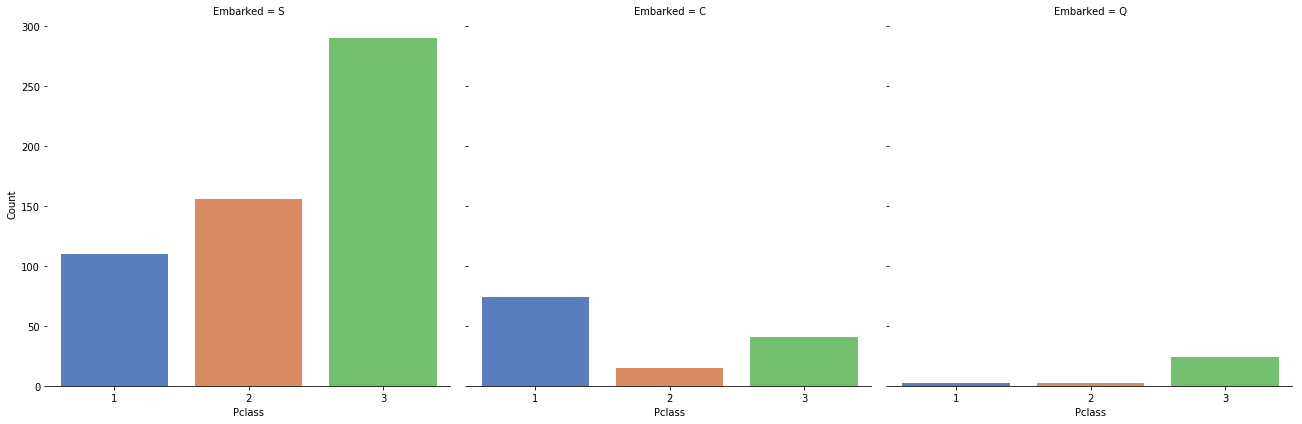

In [29]:
g = sns.factorplot("Pclass", col="Embarked",  data=train_df,
                   size=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")
##Indeed, the third class is the most frequent for passenger coming from Southampton (S) and Queenstown (Q), whereas Cherbourg passengers are mostly in first class which have the highest survival rate.
#At this point, i can't explain why first class has an higher survival rate. My hypothesis is that first class passengers were prioritised during the evacuation due to their influence.

In [30]:
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female":1}).astype(int)

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,X,S


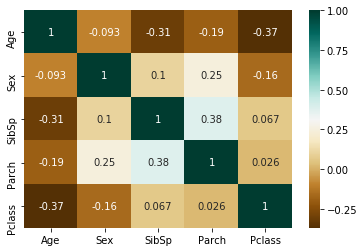

In [32]:
g = sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

In [33]:
##Convert Title
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in train_df["Name"]]
train_df["Title"] = pd.Series(dataset_title)
train_df["Title"].head()

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

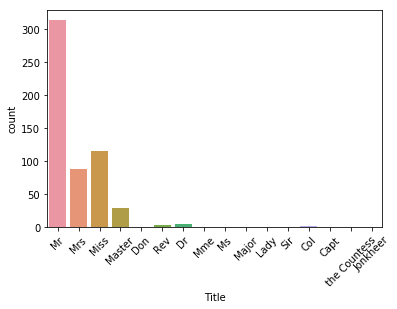

In [34]:
g = sns.countplot(x="Title",data=train_df)
g = plt.setp(g.get_xticklabels(), rotation=45) 

In [35]:
# Convert to categorical values Title 
train_df["Title"] = train_df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
title_mapping = {"Master": 0, "Miss": 1, "Ms": 1, "Mme": 2, 'Mile':1, "Mrs":1, "Mr":2, "Others": 3}
train_df['Title'] = train_df['Title'].map(title_mapping)

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,X,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,X,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,X,S,2.0


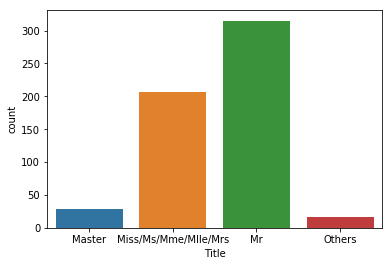

In [38]:
g = sns.countplot(train_df["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Others"])

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


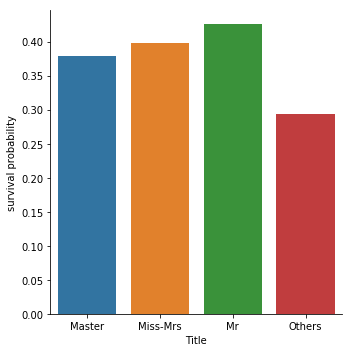

In [39]:
g = sns.factorplot(x="Title",y="Survived",data=train_df,kind="bar", ci=None)
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Others"])
g = g.set_ylabels("survival probability")

In [40]:
##Change Embark
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
##Create Family Size
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
train_df.loc[train_df["Fsize"] <= 1, 'Fsize']=0
train_df.loc[(2<=train_df["Fsize"])&(train_df["Fsize"] <= 3), 'Fsize']=1
train_df.loc[(3<=train_df["Fsize"])&(train_df["Fsize"] <= 4), 'Fsize']=2
train_df.loc[(5<=train_df["Fsize"]), 'Fsize']=3
train_df.head(10)

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,X,0,2.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,1,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,X,0,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,0,1.0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,X,0,2.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,3.948596,E46,0,0.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,3.048088,X,0,1.0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,2.409941,X,0,1.0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,3.403555,X,1,1.0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,2.815409,G6,0,1.0,1


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


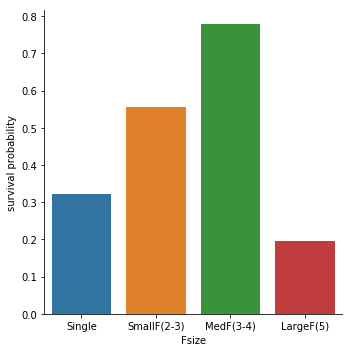

In [43]:
g = sns.factorplot(x="Fsize",y="Survived",data=train_df,kind="bar", ci=None)
g = g.set_xticklabels(["Single","SmallF(2-3)","MedF(3-4)","LargeF(5)"])
g = g.set_ylabels("survival probability")

In [44]:
##Cabin 
##神奇的code | Use the first Capital Letter
train_df["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train_df['Cabin'] ])

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


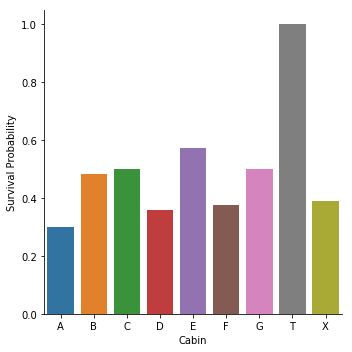

In [45]:
g = sns.factorplot(y="Survived",x="Cabin",data=train_df, kind="bar", order=['A','B','C','D','E','F','G','T','X'], ci=None)
g = g.set_ylabels("Survival Probability")

In [46]:
drop_elements = ['Name']
train_df = train_df.drop(drop_elements, axis = 1)

In [47]:
title_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, 'E': 5, "F":6, "G":7,"T":8, "X": 9}
train_df['Cabin'] = train_df['Cabin'].map(title_mapping)

In [48]:
Ticket = []
for i in list(train_df.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
train_df["Ticket"] = Ticket
train_df["Ticket"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train_df['Ticket'] ])

In [49]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,1,0,3,0,22.0,1,0,A,1.981001,9.0,0,2.0,1
1,2,1,1,1,38.0,1,0,P,4.266662,3.0,1,1.0,1
2,3,1,3,1,26.0,0,0,S,2.070022,9.0,0,1.0,0
3,4,1,1,1,35.0,1,0,X,3.972177,3.0,0,1.0,1
4,5,0,3,0,35.0,0,0,X,2.085672,9.0,0,2.0,0
6,7,0,1,0,54.0,0,0,X,3.948596,9.0,0,0.0,0
7,8,0,3,0,2.0,3,1,X,3.048088,9.0,0,1.0,3
8,9,1,3,1,27.0,0,2,X,2.409941,9.0,0,1.0,1
9,10,1,2,1,14.0,1,0,P,3.403555,7.0,1,1.0,1
10,11,1,3,1,4.0,1,1,X,2.815409,3.0,0,1.0,1


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


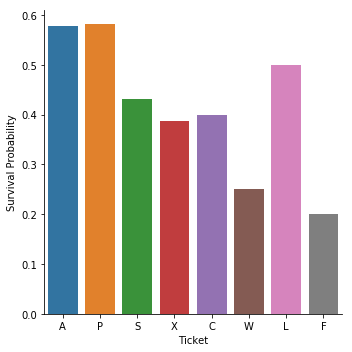

In [50]:
# train_df = pd.get_dummies(train_df, columns = ["Ticket"], prefix="T")
# train_df.head(5)
g = sns.factorplot(y="Survived",x="Ticket",data=train_df, kind="bar", hue_order='Ticket', ci=None)
g = g.set_ylabels("Survival Probability")

In [51]:
title_mapping = {"A": 1, "C": 2, "F": 3, "L": 4, 'P': 5, "S":6, "W":7,"X":8}
train_df['Ticket'] = train_df['Ticket'].map(title_mapping)
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,1,0,3,0,22.0,1,0,1.0,1.981001,9.0,0,2.0,1
1,2,1,1,1,38.0,1,0,5.0,4.266662,3.0,1,1.0,1
2,3,1,3,1,26.0,0,0,6.0,2.070022,9.0,0,1.0,0
3,4,1,1,1,35.0,1,0,8.0,3.972177,3.0,0,1.0,1
4,5,0,3,0,35.0,0,0,8.0,2.085672,9.0,0,2.0,0
6,7,0,1,0,54.0,0,0,8.0,3.948596,9.0,0,0.0,0
7,8,0,3,0,2.0,3,1,8.0,3.048088,9.0,0,1.0,3
8,9,1,3,1,27.0,0,2,8.0,2.409941,9.0,0,1.0,1
9,10,1,2,1,14.0,1,0,5.0,3.403555,7.0,1,1.0,1
10,11,1,3,1,4.0,1,1,8.0,2.815409,3.0,0,1.0,1


In [52]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm

##normalized_df = (df - df_min) / (df_max - df_min) 
train_df=normalize(train_df)
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,0.000000,0.0,1.0,0.0,0.271174,0.2,0.000000,0.000000,0.317521,1.00,0.0,0.666667,0.333333
1,0.001124,1.0,0.0,1.0,0.472229,0.2,0.000000,0.571429,0.683873,0.25,0.5,0.333333,0.333333
2,0.002247,1.0,1.0,1.0,0.321438,0.0,0.000000,0.714286,0.331789,1.00,0.0,0.333333,0.000000
3,0.003371,1.0,0.0,1.0,0.434531,0.2,0.000000,1.000000,0.636672,0.25,0.0,0.333333,0.333333
4,0.004494,0.0,1.0,0.0,0.434531,0.0,0.000000,1.000000,0.334298,1.00,0.0,0.666667,0.000000
6,0.006742,0.0,0.0,0.0,0.673285,0.0,0.000000,1.000000,0.632893,1.00,0.0,0.000000,0.000000
7,0.007865,0.0,1.0,0.0,0.019854,0.6,0.166667,1.000000,0.488556,1.00,0.0,0.333333,1.000000
8,0.008989,1.0,1.0,1.0,0.334004,0.0,0.333333,1.000000,0.386272,1.00,0.0,0.333333,0.333333
9,0.010112,1.0,0.5,1.0,0.170646,0.2,0.000000,0.571429,0.545532,0.75,0.5,0.333333,0.333333
10,0.011236,1.0,1.0,1.0,0.044986,0.2,0.166667,1.000000,0.451262,0.25,0.0,0.333333,0.333333


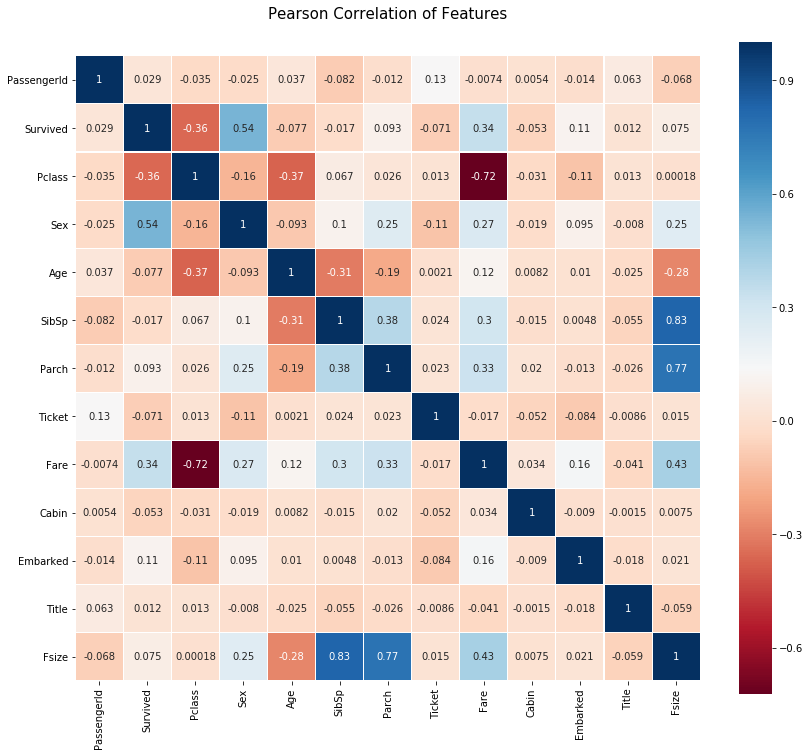

In [53]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

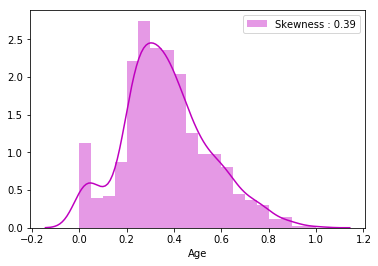

In [54]:
g = sns.distplot(train_df["Age"], color="m", label="Skewness : %.2f"%(train_df["Age"].skew()))
g = g.legend(loc="best")

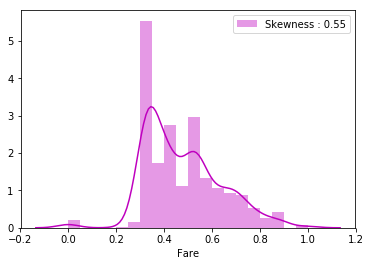

In [55]:
g = sns.distplot(train_df["Fare"], color="m", label="Skewness : %.2f"%(train_df["Fare"].skew()))
g = g.legend(loc="best")

# Clean up training data

In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,0.000000,0.0,1.0,0.0,0.271174,0.2,0.0,0.000000,0.317521,1.00,0.0,0.666667,0.333333
1,0.001124,1.0,0.0,1.0,0.472229,0.2,0.0,0.571429,0.683873,0.25,0.5,0.333333,0.333333
2,0.002247,1.0,1.0,1.0,0.321438,0.0,0.0,0.714286,0.331789,1.00,0.0,0.333333,0.000000
3,0.003371,1.0,0.0,1.0,0.434531,0.2,0.0,1.000000,0.636672,0.25,0.0,0.333333,0.333333
4,0.004494,0.0,1.0,0.0,0.434531,0.0,0.0,1.000000,0.334298,1.00,0.0,0.666667,0.000000


In [57]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,X,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,X,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,X,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,X,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,X,S


In [58]:
##Clean up test data
## Change Name to Title
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in test_df["Name"]]
test_df["Title"] = pd.Series(dataset_title)
test_df["Title"].head()
test_df["Title"] = test_df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
title_mapping = {"Master": 0, "Miss": 1, "Ms": 1, "Mme": 2, 'Mile':1, "Mrs":1, "Mr":2, "Others": 3}
test_df['Title'] = test_df['Title'].map(title_mapping)
test_df.head(5)

#Change Sex
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female":1}).astype(int)

#Change Ticket
Ticket = []
for i in list(test_df.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
test_df["Ticket"] = Ticket
test_df["Ticket"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test_df['Ticket'] ])
title_mapping = {"A": 1, "C": 2, "F": 3, "L": 4, 'P': 5, "S":6, "W":7,"X":8}
test_df['Ticket'] = test_df['Ticket'].map(title_mapping)

#Change Cabin
test_df["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test_df['Cabin'] ])
title_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, 'E': 5, "F":6, "G":7,"T":8, "X": 9}
test_df['Cabin'] = test_df['Cabin'].map(title_mapping)

#Change Embarked
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#Add Fsize
test_df["Fsize"] = test_df["SibSp"] + test_df["Parch"] + 1
test_df.loc[test_df["Fsize"] <= 1, 'Fsize']=0
test_df.loc[(2<=test_df["Fsize"])&(test_df["Fsize"] <= 3), 'Fsize']=1
test_df.loc[(3<=test_df["Fsize"])&(test_df["Fsize"] <= 4), 'Fsize']=2
test_df.loc[(5<=test_df["Fsize"]), 'Fsize']=3
test_df.head(10)

##Drop Passenger ID, Name
drop_elements = ['Name']
test_df = test_df.drop(drop_elements, axis = 1)

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [59]:
test_df=normalize(test_df)
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,0.000000,1.0,0.0,0.452723,0.000,0.000000,1.0,0.015282,1.0,1.0,0.666667,0.000000
1,0.002410,1.0,1.0,0.617566,0.125,0.000000,1.0,0.013663,1.0,0.0,0.333333,0.333333
2,0.004819,0.5,0.0,0.815377,0.000,0.000000,1.0,0.018909,1.0,1.0,0.666667,0.000000
3,0.007229,1.0,0.0,0.353818,0.000,0.000000,1.0,0.016908,1.0,0.0,0.666667,0.000000
4,0.009639,1.0,1.0,0.287881,0.125,0.166667,1.0,0.023984,1.0,0.0,0.333333,0.333333
5,0.012048,1.0,0.0,0.182382,0.000,0.000000,1.0,0.018006,1.0,0.0,0.666667,0.000000
6,0.014458,1.0,1.0,0.393380,0.000,0.000000,1.0,0.014891,1.0,1.0,0.333333,0.000000
7,0.016867,0.5,0.0,0.340630,0.125,0.166667,1.0,0.056604,1.0,0.0,0.666667,0.333333
8,0.019277,1.0,1.0,0.235131,0.000,0.000000,1.0,0.014110,1.0,0.5,0.333333,0.000000
9,0.021687,1.0,0.0,0.274693,0.250,0.000000,0.0,0.047138,1.0,0.0,0.666667,0.333333


# Modeling

In [60]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [61]:
train_df['Ticket'] = train_df['Ticket'] .replace(np.nan, 8)
train_df['Cabin'] = train_df['Cabin'] .replace(np.nan, 9)
train_df['Title'] = train_df['Title'] .replace(np.nan, 3)

In [62]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Fsize          0
dtype: int64

In [63]:
test_df['Ticket'] = test_df['Ticket'] .replace(np.nan, 8)
test_df['Cabin'] = test_df['Cabin'] .replace(np.nan, 9)
test_df['Title'] = test_df['Title'] .replace(np.nan, 3)

In [64]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Fsize          0
dtype: int64

In [65]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,0.000000,0.0,1.0,0.0,0.271174,0.2,0.000000,0.000000,0.317521,1.00,0.0,0.666667,0.333333
1,0.001124,1.0,0.0,1.0,0.472229,0.2,0.000000,0.571429,0.683873,0.25,0.5,0.333333,0.333333
2,0.002247,1.0,1.0,1.0,0.321438,0.0,0.000000,0.714286,0.331789,1.00,0.0,0.333333,0.000000
3,0.003371,1.0,0.0,1.0,0.434531,0.2,0.000000,1.000000,0.636672,0.25,0.0,0.333333,0.333333
4,0.004494,0.0,1.0,0.0,0.434531,0.0,0.000000,1.000000,0.334298,1.00,0.0,0.666667,0.000000
6,0.006742,0.0,0.0,0.0,0.673285,0.0,0.000000,1.000000,0.632893,1.00,0.0,0.000000,0.000000
7,0.007865,0.0,1.0,0.0,0.019854,0.6,0.166667,1.000000,0.488556,1.00,0.0,0.333333,1.000000
8,0.008989,1.0,1.0,1.0,0.334004,0.0,0.333333,1.000000,0.386272,1.00,0.0,0.333333,0.333333
9,0.010112,1.0,0.5,1.0,0.170646,0.2,0.000000,0.571429,0.545532,0.75,0.5,0.333333,0.333333
10,0.011236,1.0,1.0,1.0,0.044986,0.2,0.166667,1.000000,0.451262,0.25,0.0,0.333333,0.333333


In [66]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,0.000000,1.0,0.0,0.452723,0.000,0.000000,1.0,0.015282,1.0,1.0,0.666667,0.000000
1,0.002410,1.0,1.0,0.617566,0.125,0.000000,1.0,0.013663,1.0,0.0,0.333333,0.333333
2,0.004819,0.5,0.0,0.815377,0.000,0.000000,1.0,0.018909,1.0,1.0,0.666667,0.000000
3,0.007229,1.0,0.0,0.353818,0.000,0.000000,1.0,0.016908,1.0,0.0,0.666667,0.000000
4,0.009639,1.0,1.0,0.287881,0.125,0.166667,1.0,0.023984,1.0,0.0,0.333333,0.333333


In [67]:
drop_elements = ['PassengerId']
train_df = train_df.drop(drop_elements, axis = 1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,0.0,1.0,0.0,0.271174,0.2,0.0,0.000000,0.317521,1.00,0.0,0.666667,0.333333
1,1.0,0.0,1.0,0.472229,0.2,0.0,0.571429,0.683873,0.25,0.5,0.333333,0.333333
2,1.0,1.0,1.0,0.321438,0.0,0.0,0.714286,0.331789,1.00,0.0,0.333333,0.000000
3,1.0,0.0,1.0,0.434531,0.2,0.0,1.000000,0.636672,0.25,0.0,0.333333,0.333333
4,0.0,1.0,0.0,0.434531,0.0,0.0,1.000000,0.334298,1.00,0.0,0.666667,0.000000


In [68]:
train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=train_df['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train_df[train_df.columns[1:]]
Y=train_df['Survived']

In [69]:
##Logistic Regression Score: 0.8391608391608392
Lg_model = LogisticRegression()
Lg_model.fit(train_X,train_Y)
prediction3=Lg_model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8461538461538461


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(test_Y, prediction3)) 
sklearn.metrics.confusion_matrix(test_Y, Lg_model.predict(test_X))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88        85
         1.0       0.86      0.74      0.80        58

   micro avg       0.85      0.85      0.85       143
   macro avg       0.85      0.83      0.84       143
weighted avg       0.85      0.85      0.84       143



array([[78,  7],
       [15, 43]])

In [71]:
print(np.sqrt(metrics.mean_squared_error(test_Y, prediction3)))

0.3922322702763681


In [72]:
##The curves of different models can be compared directly in general or for different thresholds.
##The area under the curve (AUC) can be used as a summary of the model skill

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


roc_auc_score for Logistic Regression:  0.8900608519269777


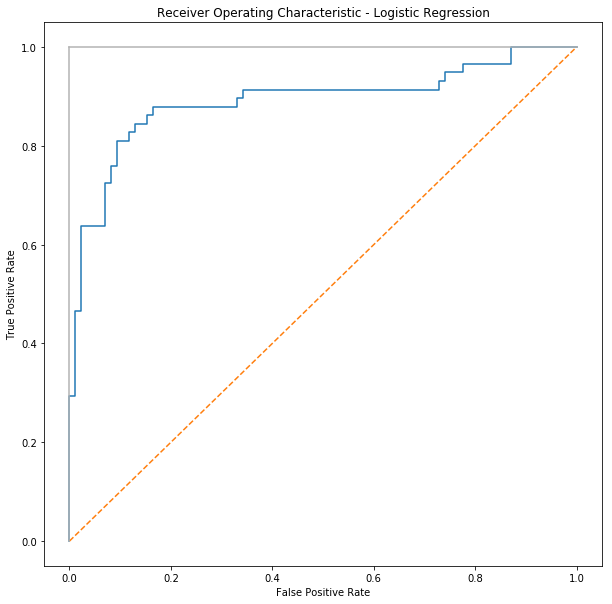

AUC: 0.890


In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
clf1 = LogisticRegression();
clf1.fit(train_X, train_Y);
y_score1 = clf1.predict_proba(test_X)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(test_Y, y_score1)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(test_Y, y_score1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = roc_auc_score(test_Y, y_score1)
print('AUC: %.3f' % auc)

# Decision Tree

In [74]:
##max_depth = 7, score: 0.8461538461538461
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
max_depth_range = list(range(1, 50))
accuracy = []
for i in max_depth_range: 
    DT_model=tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =i, min_samples_leaf = 5)
    DT_model.fit(train_X,train_Y)
    prediction4=DT_model.predict(test_X)
    confidence = metrics.accuracy_score(prediction4,test_Y)
    accuracy.append(confidence)
print(accuracy)

[0.8321678321678322, 0.7692307692307693, 0.8391608391608392, 0.8041958041958042, 0.8041958041958042, 0.7972027972027972, 0.8321678321678322, 0.8461538461538461, 0.8321678321678322, 0.8321678321678322, 0.8251748251748252, 0.8251748251748252, 0.8251748251748252, 0.8181818181818182, 0.8181818181818182, 0.8251748251748252, 0.8251748251748252, 0.8181818181818182, 0.8251748251748252, 0.8251748251748252, 0.8251748251748252, 0.8181818181818182, 0.8251748251748252, 0.8181818181818182, 0.8181818181818182, 0.8251748251748252, 0.8251748251748252, 0.8251748251748252, 0.8181818181818182, 0.8251748251748252, 0.8251748251748252, 0.8251748251748252, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8251748251748252, 0.8181818181818182, 0.8251748251748252, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182]


In [75]:
max(accuracy)

0.8461538461538461

In [76]:
DT_model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =7, min_samples_leaf = 5)
DT_model.fit(train_X,train_Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

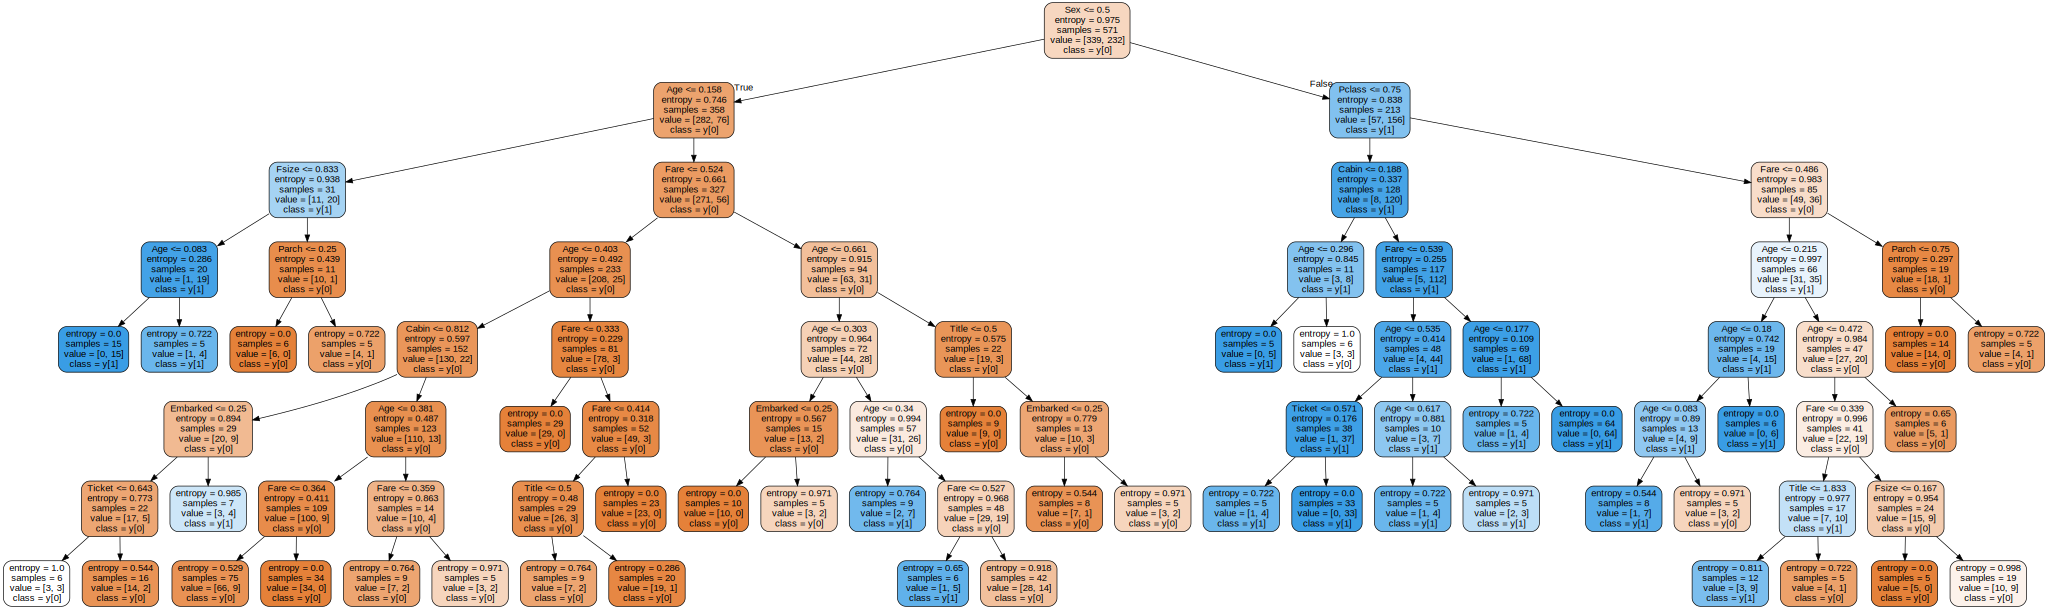

In [77]:
import graphviz 
dot_data = tree.export_graphviz(DT_model, out_file=None, 
                                feature_names = train_X.columns, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph
# graph.render("image",view=True)

In [78]:
##显示特征重要性
pd.concat([pd.DataFrame(train_X.columns, columns=['variable']),
         pd.DataFrame(DT_model.feature_importances_, columns=['importance'])],
         axis=1).sort_values(by='importance', ascending=False)[:10]

,variable,importance
1,Sex,0.336718
2,Age,0.205505
0,Pclass,0.157099
6,Fare,0.137584
10,Fsize,0.068196
7,Cabin,0.027185
9,Title,0.021521
8,Embarked,0.019962
5,Ticket,0.016316
4,Parch,0.009916


In [79]:
i=1
for i in range(len(accuracy)):
    if accuracy[i] == max(accuracy):
        print(i)
        break
    else:
        i+=1 

7


In [80]:
max(accuracy)

0.8461538461538461

In [81]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(test_Y, prediction4)) 
sklearn.metrics.confusion_matrix(test_Y, prediction4)

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86        85
         1.0       0.83      0.69      0.75        58

   micro avg       0.82      0.82      0.82       143
   macro avg       0.82      0.80      0.81       143
weighted avg       0.82      0.82      0.81       143



array([[77,  8],
       [18, 40]])

In [82]:
print(np.sqrt(metrics.mean_squared_error(test_Y, prediction4)))

0.4264014327112209


roc_auc_score for Decision Tree:  0.8295131845841786


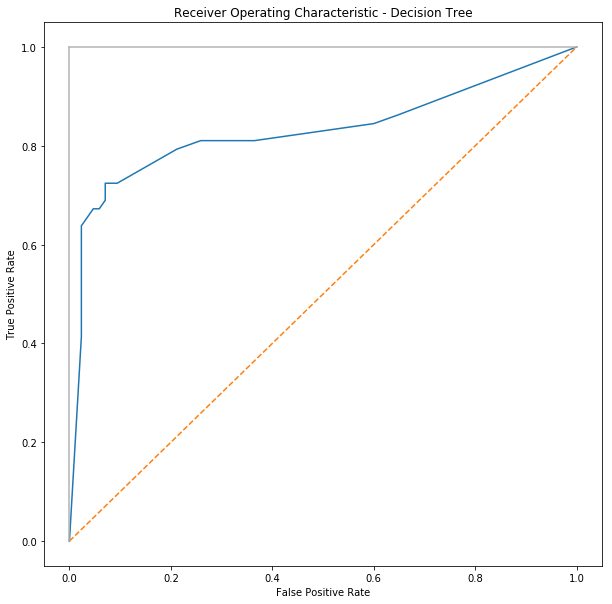

AUC: 0.830


In [104]:
from sklearn.metrics import roc_curve, roc_auc_score
clf1 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =7, min_samples_leaf = 5)
clf1.fit(train_X, train_Y);
y_score1 = clf1.predict_proba(test_X)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(test_Y, y_score1)
print('roc_auc_score for Decision Tree: ', roc_auc_score(test_Y, y_score1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = roc_auc_score(test_Y, y_score1)
print('AUC: %.3f' % auc)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_range = range(1, 51)
k_scores = []
for K in k_range:
    KNN_model=KNeighborsClassifier(n_neighbors = K)
    KNN_model.fit(train_X,train_Y)
    print('K=', K)
    prediction5=KNN_model.predict(test_X)
    score = accuracy_score(test_Y,prediction5)
    print(score)
    k_scores.append(score)
   

K= 1
0.7272727272727273
K= 2
0.7552447552447552
K= 3
0.7482517482517482
K= 4
0.7762237762237763
K= 5
0.7762237762237763
K= 6
0.7832167832167832
K= 7
0.7552447552447552
K= 8
0.7832167832167832
K= 9
0.7972027972027972
K= 10
0.8041958041958042
K= 11
0.8251748251748252
K= 12
0.8251748251748252
K= 13
0.8181818181818182
K= 14
0.8251748251748252
K= 15
0.8181818181818182
K= 16
0.8251748251748252
K= 17
0.8181818181818182
K= 18
0.8251748251748252
K= 19
0.8321678321678322
K= 20
0.8321678321678322
K= 21
0.8391608391608392
K= 22
0.8251748251748252
K= 23
0.8321678321678322
K= 24
0.8321678321678322
K= 25
0.8391608391608392
K= 26
0.8251748251748252


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Use

K= 27
0.8321678321678322
K= 28
0.8321678321678322
K= 29
0.8321678321678322
K= 30
0.8391608391608392
K= 31
0.8461538461538461
K= 32
0.8391608391608392
K= 33
0.8391608391608392
K= 34
0.8391608391608392
K= 35
0.8321678321678322
K= 36
0.8321678321678322
K= 37
0.8251748251748252
K= 38
0.8251748251748252
K= 39
0.8251748251748252
K= 40
0.8251748251748252
K= 41
0.8251748251748252
K= 42
0.8251748251748252
K= 43
0.8251748251748252
K= 44
0.8251748251748252
K= 45
0.8251748251748252
K= 46
0.8251748251748252
K= 47
0.8251748251748252
K= 48
0.8251748251748252
K= 49
0.8321678321678322
K= 50
0.8321678321678322


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Use

In [85]:
max(k_scores)  ##k = 3, 0.6923076923076923

0.8461538461538461

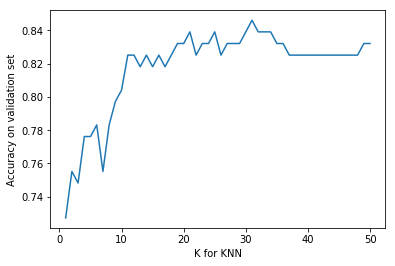

[ 0  2  1  6  3  4  5  7  8  9 14 12 16 13 36 37 38 39 40 41 25 42 11 43
 21 45 46 47 17 15 10 44 35 34 49 28 27 26 48 23 22 19 18 32 31 29 20 33
 24 30]


In [86]:
plt.plot(k_range, k_scores)
plt.xlabel('K for KNN')
plt.ylabel('Accuracy on validation set')
plt.show()
print(np.array(k_scores).argsort())

In [87]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(test_Y, prediction5)) 
sklearn.metrics.confusion_matrix(test_Y, prediction5)

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87        85
         1.0       0.87      0.69      0.77        58

   micro avg       0.83      0.83      0.83       143
   macro avg       0.84      0.81      0.82       143
weighted avg       0.84      0.83      0.83       143



array([[79,  6],
       [18, 40]])

In [88]:
print(np.sqrt(metrics.mean_squared_error(test_Y, prediction5)))

0.40967324519935133


roc_auc_score for KNN:  0.8829614604462475


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


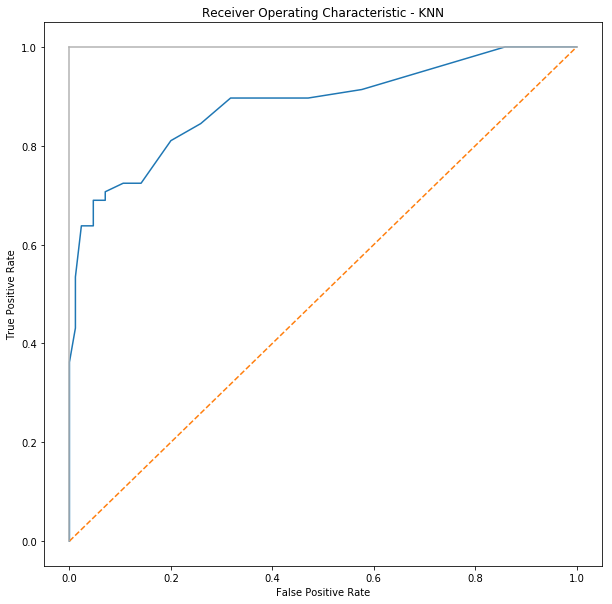

AUC: 0.883


In [89]:
from sklearn.metrics import roc_curve, roc_auc_score
clf1 = KNeighborsClassifier(n_neighbors = 31)
clf1.fit(train_X, train_Y);
y_score1 = clf1.predict_proba(test_X)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(test_Y, y_score1)
print('roc_auc_score for KNN: ', roc_auc_score(test_Y, y_score1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = roc_auc_score(test_Y, y_score1)
print('AUC: %.3f' % auc)

In [90]:
RF_model=RandomForestClassifier(n_estimators=100)
RF_model.fit(train_X,train_Y)
prediction7=RF_model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.7692307692307693


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [91]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(test_Y, prediction7)) 
sklearn.metrics.confusion_matrix(test_Y, prediction7)

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81        85
         1.0       0.75      0.66      0.70        58

   micro avg       0.77      0.77      0.77       143
   macro avg       0.76      0.75      0.76       143
weighted avg       0.77      0.77      0.77       143



array([[72, 13],
       [20, 38]])

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


roc_auc_score for Random Forest:  0.8267748478701825


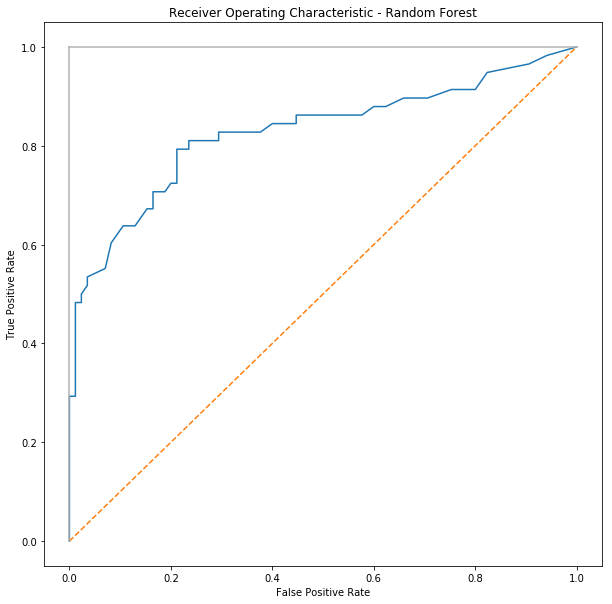

AUC: 0.827
AUC1: 1.000


In [107]:
from sklearn.metrics import roc_curve, roc_auc_score
clf1 = RandomForestClassifier(n_estimators=100)
clf1.fit(train_X, train_Y);
y_score1 = clf1.predict_proba(test_X)[:,1]
y_score2 = clf1.predict_proba(train_X)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(test_Y, y_score1)
print('roc_auc_score for Random Forest: ', roc_auc_score(test_Y, y_score1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = roc_auc_score(test_Y, y_score1)
auc1 = roc_auc_score(train_Y, y_score2)
print('AUC: %.3f' % auc)
print('AUC1: %.3f' % auc1)

In [93]:
print(np.sqrt(metrics.mean_squared_error(test_Y, prediction7)))

0.4803844614152614


In [94]:
##显示Random Forest特征重要性
pd.concat([pd.DataFrame(train_X.columns, columns=['variable']),
         pd.DataFrame(RF_model.feature_importances_, columns=['importance'])],
         axis=1).sort_values(by='importance', ascending=False)[:10]

,variable,importance
1,Sex,0.222557
6,Fare,0.209816
2,Age,0.202979
0,Pclass,0.089049
7,Cabin,0.056358
5,Ticket,0.049127
9,Title,0.044384
10,Fsize,0.039697
3,SibSp,0.030960
4,Parch,0.030318


[0.7423904589058854, 0.7690130498660444, 0.7829260651629073, 0.7811403508771929]


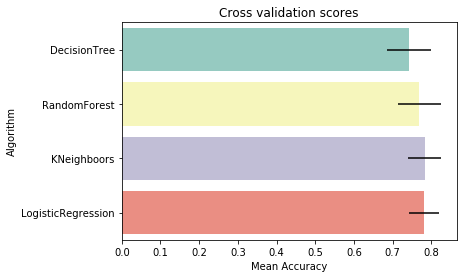

In [95]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_X, y = train_Y, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree",
"RandomForest","KNeighboors","LogisticRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std}, ci=None)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
print(cv_means)

In [96]:
# RFC Parameters tunning  Random Forest
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(train_X, train_Y)

prediction8=gsRFC.predict(test_X)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   32.2s finished
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8161120840630472

In [97]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(test_Y, prediction8)) 
sklearn.metrics.confusion_matrix(test_Y, prediction8)

              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        85
         1.0       0.86      0.62      0.72        58

   micro avg       0.80      0.80      0.80       143
   macro avg       0.82      0.78      0.78       143
weighted avg       0.81      0.80      0.80       143



array([[79,  6],
       [22, 36]])

In [98]:
pd.concat([pd.DataFrame(train_X.columns, columns=['variable']),
         pd.DataFrame(RF_model.feature_importances_, columns=['importance'])],
         axis=1).sort_values(by='importance', ascending=False)[:10]

,variable,importance
1,Sex,0.222557
6,Fare,0.209816
2,Age,0.202979
0,Pclass,0.089049
7,Cabin,0.056358
5,Ticket,0.049127
9,Title,0.044384
10,Fsize,0.039697
3,SibSp,0.030960
4,Parch,0.030318


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


roc_auc_score for KNN:  0.8017241379310345


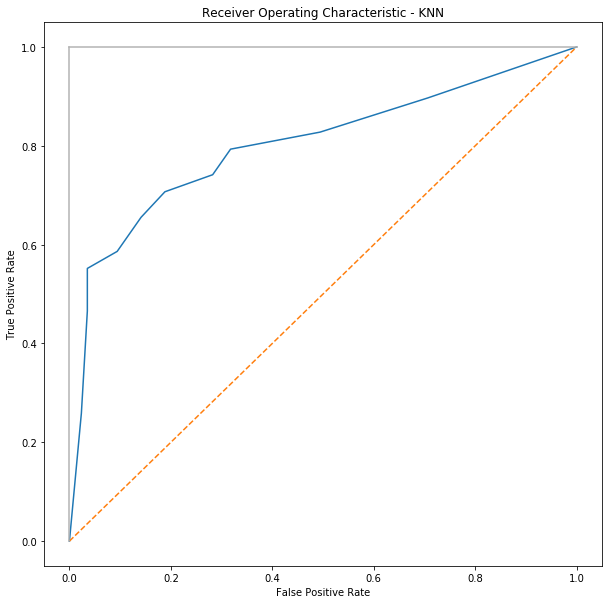

AUC: 0.802
AUC1: 0.999


In [109]:
from sklearn.metrics import roc_curve, roc_auc_score
clf1 = RandomForestClassifier()
clf1.fit(train_X, train_Y);
y_score1 = clf1.predict_proba(test_X)[:,1]
y_score2 = clf1.predict_proba(train_X)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(test_Y, y_score1)
print('roc_auc_score for KNN: ', roc_auc_score(test_Y, y_score1))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = roc_auc_score(test_Y, y_score1)
print('AUC: %.3f' % auc)
auc1 = roc_auc_score(train_Y, y_score2)
print('AUC1: %.3f' % auc1)

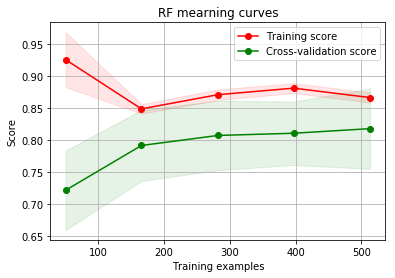

In [100]:
## Plot Learning curves:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",train_X, train_Y,cv=kfold)

Text(0.5, 1.0, 'Feature Importance in Random Forests')

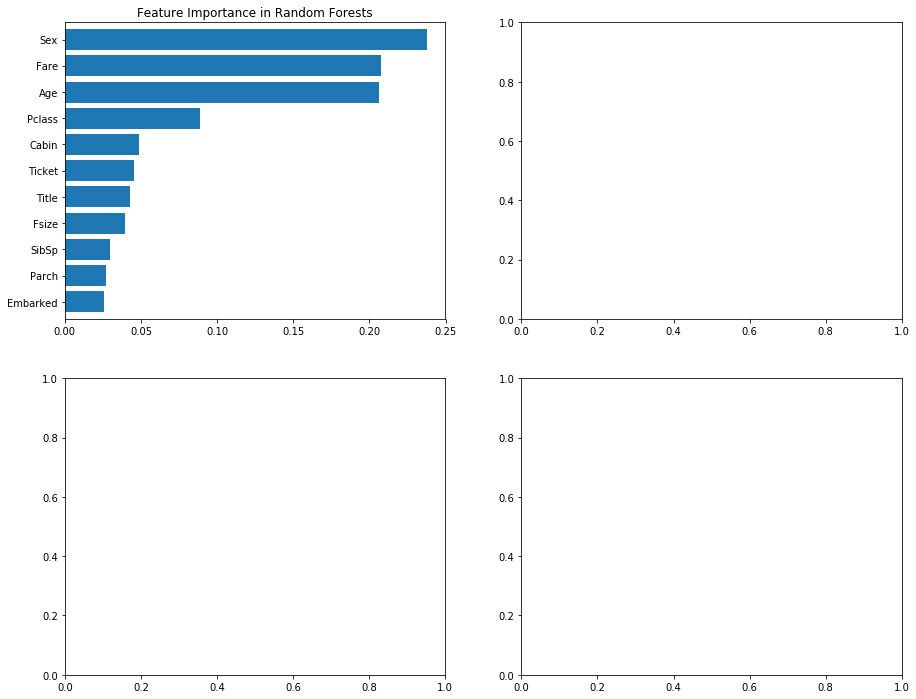

In [101]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
##其他模型还要看为什么不用cross_validation， 加油呢

In [102]:
from sklearn.model_selection import KFold, cross_val_score
n_folds = 5 # number of folds
def get_cv_scores(model, X, y, print_scores=True):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X) # create folds
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf)) # get rmse
    if print_scores:
        print(f'Root mean squared error: {rmse.mean():.3f} ({rmse.std():.3f})')
    return [rmse]

In [103]:
Lg_model = LogisticRegression()
DT_model=tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =i, min_samples_leaf = 5)
KNN_model=KNeighborsClassifier(n_neighbors = 3)
RFC = RandomForestClassifier()

All = [Lg_model, DT_model, KNN_model, RFC]
for model in All:
    get_cv_scores(model, train_X, train_Y)

#RMSE value ≥0.5 reflects the poor ability of the model to accurately predict the data. 0.4010475792710397
##LG 0.4010475792710397
##DT 0.4264014327112209
##KNN 0.6257862187747438
##RF  0.4803844614152614

Root mean squared error: 0.465 (0.033)
Root mean squared error: 0.449 (0.038)
Root mean squared error: 0.493 (0.017)
Root mean squared error: 0.468 (0.037)


/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xia